In [1]:
# import libraries
import matplotlib.pyplot as plt
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.core.soilmodels import API_sand, API_clay
from openpile.utils.py_curves import api_sand
from openpile.analyses import simple_winkler_analysis

In [2]:
# create pile
p = Pile.create(name = "WTG01",
        kind='Circular',
        material='Steel',
        top_elevation = 0,
        pile_sections={
            'length':[10,30],
            'diameter':[7.5,7.5],
            'wall thickness':[0.07, 0.08],
        } 
    )

In [3]:
# create pile
p = Pile.create(name = "WTG01",
        kind='Circular',
        material='Steel',
        top_elevation = 0,
        pile_sections={
            'length':[10,30],
            'diameter':[7.5,7.5],
            'wall thickness':[0.07, 0.08],
        } 
    )

# Create Soil Profile
sp = SoilProfile(
    name="BH01",
    top_elevation=0,
    water_elevation=0,
    layers=[
        Layer(
            name='Layer0',
            top=0,
            bottom=-40,
            weight=18,
            lateral_model= API_sand(phi=30, Neq=100)
        ),
    ]
)

# Create Model 
M = Model.create(name="", pile=p, soil=sp)

print(sp)

Layer 1
------------------------------
Name: Layer0
Elevation: (0.0) - (-40.0) m
Weight: 18.0 kN/m3
Lateral model: 	API sand
	phi = 30.0°
	Cyclic, N = 100 cycles
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [4]:
# create point load
# mesh.set_support(elevation=-10, )
M.set_support(elevation=-40, Tx = True)
M.set_pointdisplacement(elevation=0, Ty=0.1)
# M.set_pointload(elevation=0,Px=-20000, Py=500000)


In [5]:
result = simple_winkler_analysis(model=M)

Converged at iteration no. 3


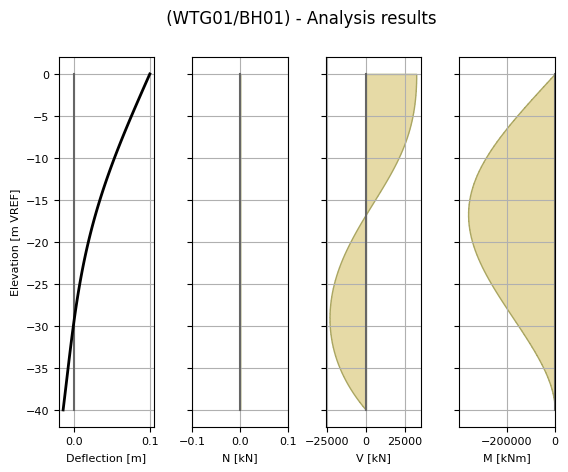

In [6]:
result.plot()

In [7]:
from openpile.construct import Layer
from openpile.core.soilmodels import API_clay
    
# Create a layer
layer1 = Layer(name='Soft Clay',
               top=0,
               bottom=-10,
               weight=18,
               lateral_model=API_clay(Su=[30,35], eps50=[0.01, 0.02], Neq=100), )

print(layer1)

Name: Soft Clay
Elevation: (0.0) - (-10.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 30.0-35.0 kPa
	eps50 = 0.01-0.02
	Cyclic, N = 100 cycles
Axial model: None
